In [15]:
from openpyxl import Workbook
from openpyxl.styles import Border, PatternFill, Side, Alignment, Font
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Create a new workbook
wb = Workbook()
ws = wb.active
ws.title = "Folha_Cert"

now = datetime.now()
new_date = now + relativedelta(months=3)

# Sample data (replace with your actual data)
data = [
    ["Data Subscribe", "Value Subscribe", "Data Renew", "Debs Tax", "Recover"],
    ["28/12/2022", 100, '28/03/2023', 0.0284, "TRUE"],
    ["06/01/2023", 4000, '06/04/2023', 0.0309, "TRUE"],
    ["23/01/2023", 1100, '23/04/2023', 0.0309, "TRUE"],
    ["06/03/2023", 2000, '06/06/2023', 0.0350, "TRUE"],
    ["22/05/2023", 2000, '22/08/2023', 0.0350, "TRUE"],
    ["31/07/2023", 3000, '31/10/2023', 0.0275, "TRUE"],
    ["25/09/2023", 2500, '25/12/2023', 0.0275, "TRUE"],
    ["01/02/2024", 3000, '01/05/2024', 0.0275, "FALSE"],
    ["27/03/2024", 1500, '27/06/2024', 0.0275, "FALSE"],
    ["27/06/2024", 2000, '27/09/2024', 0.0275, "FALSE"]
]

number_format = "[$-409]DD[/MM[/YYYY]]"
date_format = ws.cell(row=3, column=1).number_format  # Get default format
alignment = Alignment(horizontal='center')

# Input data in table using "data" array
for row in range(2, len(data) + 2):  
    for col in range(1, len(data[0]) + 1):
        ws.cell(row=row, column=col).value = data[row - 2][col - 1]

# Manually apply bold text and align header for center
for i in range(1, int(ws.max_column) + 1):
    ws.cell(row=2, column=i).alignment = alignment
    ws.cell(row=2, column=i).font = Font(bold=True)

# Manually apply borders and styles (example)
for row in range(1, len(data) + 2):
    for col in range(1, len(data[0]) + 1):
        cell = ws.cell(row=row, column=col)
        
        # Set borders
        cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'),
                             left=Side(style='thin'), right=Side(style='thin'))
        # Set background color (example)
        if row == 2:  # Format borders header and color
            cell.fill = PatternFill(start_color='FF90C2F0', end_color='FF90C2F0', fill_type='solid')
        if col == 2 and row >= 3: # Format money invested in Aforro
            cell.number_format = "#,##0€"
        elif col == 4 and row >= 3: # Format tax applied
            percentage_value = cell.value * 100
            cell.value = percentage_value

# Save the workbook
wb.save("formatted_table.xlsx")
wb.close()

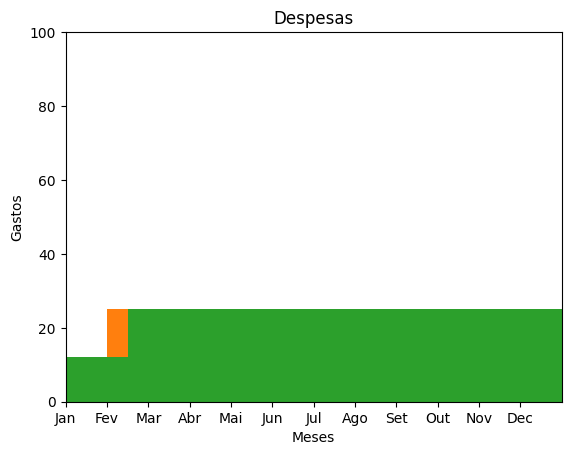

In [59]:
import matplotlib.pyplot as plt

plt.axis((0, 12, 0, 100))

x = ['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set','Out','Nov','Dec']
y = [1, 10, 12, 12, 7, 10, 10, 8,7,9,15,25]
gas = [3, 9, 13, 10, 11, 15, 13, 8, 9,11,15,17]
elect = [7, 10, 14, 10, 11, 20, 15, 10, 13, 17, 11,20]
agua = [17, 15, 14, 5, 10, 13, 16, 17, 15, 12, 17,19]

# gráfico de linhas
plt.plot(x, y, gas)  
plt.plot( x, y, elect) 
plt.plot( x, y, agua) 

# gráfico de pontos
# plt.scatter(x,y)
# gráfico de barras
#plt.bar(x,y)  

plt.title("Despesas")
plt.xlabel("Meses")
plt.ylabel("Gastos")

# Showing plot
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib

df = pd.read_csv('music.csv')

inputs = df.drop(['genre'], axis = 'columns')
target = df['genre']
model = DecisionTreeClassifier(random_state=5)

# getting data using information integer by inputs and targets
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.8, stratify=target, random_state=5)

model.fit(inputs_train, target_train)

# getting data using information integer by inputs and targets
predictions = model.predict(inputs_test) 
# accurancy of data using some informations, line 8
score = accuracy_score(target_test, predictions)
score

0.4666666666666667

In [2]:
from openpyxl import load_workbook
from openpyxl.styles import Border, Side, PatternFill
from datetime import datetime
from dateutil.relativedelta import relativedelta
from colorama import Fore, Style


def save_info(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']

    now = datetime.now()
    new_date = now + relativedelta(months=3)
    value_invest = int(input("Value invest: "))

    data = [
        [now.strftime("%d/%m/%Y"), int(value_invest), new_date.strftime("%d/%m/%Y"), 0.0275, "FALSE"]
    ]

    for row in range(2, len(data) + 2):
        max_row = sheet_ranges.max_row + 1
        for col in range(1, len(data[0]) + 1):
            sheet_ranges.cell(row=max_row, column=col).value = data[row - 2][col - 1]
            cell = sheet_ranges.cell(row=max_row, column=col)

            # Formatting borders data
            cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'), left=Side(style='thin'),
                                 right=Side(style='thin'))

            # Formatting cells
            if col == 2 and cell.row == max_row:
                cell.number_format = '#,##0€'
            elif col == 4 and cell.row == max_row:  # Format tax applied
                cell.value = round(cell.value * 100, 2)

    print(Style.BRIGHT + "The invest was added with success!")

    wb.save(file_to_load)

    print(Style.BRIGHT + Fore.GREEN + "Document saved!")
    wb.close()
    print(Style.BRIGHT + Fore.WHITE + "Document close!")


def update_info(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']

    #value_updated = int(input("Value updated: "))
    #sheet_ranges.cell(row=24, column=2).value = value_updated
    
    wb.save(file_to_load)
    remove_rows(file_to_load)
    print(Style.BRIGHT + Fore.GREEN + "Document saved!")


def remove_rows(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']
    line, _ = 3, 1
    for row in sheet_ranges.iter_rows(min_row=3, max_col=sheet_ranges.max_column, max_row=sheet_ranges.max_row, values_only=True):
        for cell in row:
            if cell == 0:
                sheet_ranges.delete_rows(line, amount=1)
        line += 1
    wb.save(file_to_load)
    wb.close()
    print(Style.BRIGHT + Fore.WHITE + "Document close!")


opt_menu = 0

while opt_menu < 3:
    print(Style.BRIGHT + Fore.WHITE + ''' 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    ''')
    option = int(input(Style.BRIGHT + Fore.WHITE + "Option: "))

    if option == 1:
        opt_menu = option
        file = str(input("Name of file: "))
        save_info(file)  # to insert
    if option == 2:
        opt_menu = option
        file = str(input("Name of file: "))
        update_info(file)
    if option == 3:
        opt_menu = option
        print("Done!!")

 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    


Option:  1
Name of file:  formatted_table.xlsx
Value invest:  1550


Document saved!
Document close!
 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    


Option:  3


Done!!


In [1]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox, font
from openpyxl import load_workbook
from openpyxl.styles import Border, Side
from datetime import datetime
from dateutil.relativedelta import relativedelta

def form_insert_data():
    frm_insert.pack(fill="both", expand=True)

def on_click_data(tree_upd, file, sheet):
    if file:
        selected_item = tree_upd.selection()
        if selected_item:
            item_id = selected_item[0]
            value_cell = sheet.cell(row=int(item_id), column=2).value

            frm_update = tk.Frame(windows, padx=50, pady=25)
            frm_update.pack(expand=True, fill="both")

            label_value_upgrade = tk.Label(frm_update, text="Value (€):", fg="black", font=font.Font(weight="bold"))
            label_value_upgrade.pack()
            # Create the entry widget
            update_value = tk.Entry(frm_update)
            update_button = tk.Button(frm_update, text="OK", width=4, height=2, 
                                      command=lambda: update_data_excel(tree_upd, value_cell, int(update_value.get()),
                                                                        item_id, file, frm_update),
                                      fg="blue", font=font.Font(weight="bold"))
            update_value.pack()
            update_button.pack()

def update_data_excel(tree_updt, cell_value, value_upd, id_row, file_xlsx, frm_update):
    workbook = load_workbook(file_xlsx)
    sheet = workbook.active
    tree_updt.set(id_row, column=1, value=cell_value - value_upd)
    sheet.cell(row=int(id_row), column=2).value = int(cell_value) - value_upd

    if sheet.cell(row=int(id_row), column=2).value == 0:
        tree_updt.delete(id_row)
        sheet.delete_rows(int(id_row), amount=1)

    workbook.save(file_xlsx)
    workbook.close()
    frm_update.destroy()
            
def load_excel_data():
    frm_insert.forget()
    try:
        file_xlsx = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx")])
        if file_xlsx:
            workbook = load_workbook(file_xlsx)
            sheet = workbook.active

            label = tk.Label(text="Tabela Certificados Aforro\n", font=("Courier New", 13, "bold underline"))
            label.pack()

            # Create a Treeview widget
            tree = ttk.Treeview()
            tree.pack(expand=True, fill="both")
            # # Get column names from the first row
            columns = list(sheet.iter_rows(values_only=True))[1]

            # Configure columns
            tree["columns"] = columns
            tree["show"] = "headings"
            # Set column headings
            for col in columns:
                tree.heading(col, text=col)

            # Insert data into the Treeview
            for row_num, row in enumerate(sheet.iter_rows(min_row=3, values_only=True), start=3):
                tree.insert("", "end",  iid=row_num, values=row)

            messagebox.showinfo("SUCCESS", "All information was loaded.")

            tree.bind("<<TreeviewSelect>>", lambda event: on_click_data(tree, file_xlsx, sheet))
    except Exception as e:
        messagebox.showerror("ERROR", f"Error loading Excel file: {e}")

def save_excel_info(value_invest):
    file_xlsx = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx")])
    if file_xlsx:
        wb = load_workbook(file_xlsx)
        sheet_ranges = wb.active

        now = datetime.now()
        new_date = now + relativedelta(months=3)

        if value_invest.isalpha() or value_invest == '' or value_invest == ' ':
            messagebox.showwarning("WARNING", "The invest must be above 0 and doesn't a string value")
        elif int(value_invest) == 0:
            messagebox.showwarning("WARNING", "The invest must be above 0 and doesn't a string value")
        else:
            data = [
                [now.strftime("%d/%m/%Y"), int(value_invest), new_date.strftime("%d/%m/%Y"), 0.0275, "FALSE"]
            ]

            for row in range(2, len(data) + 2):
                max_row = sheet_ranges.max_row + 1
                for col in range(1, len(data[0]) + 1):
                    sheet_ranges.cell(row=max_row, column=col).value = data[row - 2][col - 1]
                    cell = sheet_ranges.cell(row=max_row, column=col)

                    # Formatting borders data
                    cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'), left=Side(style='thin'),
                                         right=Side(style='thin'))

                    # Formatting cells
                    if col == 2 and cell.row == max_row:
                        cell.number_format = '#,##0€'
                    elif col == 4 and cell.row == max_row:  # Format tax applied
                        cell.value = round(cell.value * 100, 2)

            wb.save(file_xlsx)
            messagebox.showinfo("SUCCESS", "The invest was added with success!")
        wb.close()

# Create the main window
windows = tk.Tk()
windows.title("AforroApp")
windows.iconbitmap("python_icon.ico")
windows.geometry("800x600")

# Create a menu bar
menubar = tk.Menu()
windows.config(menu=menubar)

# Create entries menu
menu = tk.Menu(menubar, tearoff=0)
menu_2 = tk.Menu(menubar, tearoff=0)

# Menu open and load data Excel file and insert new data
menubar.add_cascade(label="File", menu=menu)
menu.add_command(label="Open", command=load_excel_data)
menu.add_command(label="Insert data", command=form_insert_data)

# Menu close menu window
menubar.add_cascade(label="Windows", menu=menu_2)
menu_2.add_command(label="Exit", command=windows.quit)

# Frame to insert investment value
frm_insert = tk.Frame(windows, padx=50, pady=25)
frm_insert.pack(expand=True, fill="both")

tk.Label(frm_insert, text="Value (€):", fg="black", font=font.Font(weight="bold")).grid(row=0, column=0, padx=5,
                                                                                        pady=5)
value_entry = tk.Entry(frm_insert)
value_entry.grid(row=0, column=1, padx=5, pady=5)
tk.Button(frm_insert, text="OK", width=4, height=2, command=lambda: save_excel_info(value_entry.get()), fg="blue",
          font=font.Font(weight="bold")).grid(row=0, column=2, padx=5, pady=5)

frm_insert.forget()

windows.mainloop()

In [47]:
for x in range(1,11):
    print(" " * (10 - x) + "*" * x + "*" * x)
for a in range(1,5):
    print("\t" + "*" * y)

         **
        ****
       ******
      ********
     **********
    ************
   **************
  ****************
 ******************
********************
	***
	***
	***
	***
